**IMPORTING LIBRARIES**

In [1]:
# Data Manipulation 
import numpy as np
import pandas as pd

# Visualization 
import matplotlib.pyplot as plt
import seaborn as sns

# Feature Selection and Encoding
from sklearn.feature_selection import RFE, RFECV
from sklearn.decomposition import PCA
from sklearn.preprocessing import OneHotEncoder, LabelEncoder,StandardScaler

# Machine learning 
from sklearn import model_selection,preprocessing, metrics, linear_model
from sklearn.model_selection import StratifiedKFold
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LinearRegression, LogisticRegression, Ridge, Lasso
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier,BaggingClassifier,AdaBoostClassifier,GradientBoostingClassifier

# Grid and Random Search
import scipy.stats as st
from scipy.stats import randint as sp_randint
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV

# Metrics
from sklearn.metrics import precision_recall_fscore_support, roc_curve, auc

# Managing Warnings 
import warnings
warnings.filterwarnings('ignore')

# Plot the Figures Inline
%matplotlib inline

**READ THE TRAIN DATA**

In [2]:
df_train=pd.read_csv('../input/human-activity-recognition-with-smartphones/train.csv')
df_train.head()

,tBodyAcc-mean()-X,tBodyAcc-mean()-Y,tBodyAcc-mean()-Z,tBodyAcc-std()-X,tBodyAcc-std()-Y,tBodyAcc-std()-Z,tBodyAcc-mad()-X,tBodyAcc-mad()-Y,tBodyAcc-mad()-Z,tBodyAcc-max()-X,...,fBodyBodyGyroJerkMag-kurtosis(),"angle(tBodyAccMean,gravity)","angle(tBodyAccJerkMean),gravityMean)","angle(tBodyGyroMean,gravityMean)","angle(tBodyGyroJerkMean,gravityMean)","angle(X,gravityMean)","angle(Y,gravityMean)","angle(Z,gravityMean)",subject,Activity
0,0.288585,-0.020294,-0.132905,-0.995279,-0.983111,-0.913526,-0.995112,-0.983185,-0.923527,-0.934724,...,-0.710304,-0.112754,0.030400,-0.464761,-0.018446,-0.841247,0.179941,-0.058627,1,STANDING
1,0.278419,-0.016411,-0.123520,-0.998245,-0.975300,-0.960322,-0.998807,-0.974914,-0.957686,-0.943068,...,-0.861499,0.053477,-0.007435,-0.732626,0.703511,-0.844788,0.180289,-0.054317,1,STANDING
2,0.279653,-0.019467,-0.113462,-0.995380,-0.967187,-0.978944,-0.996520,-0.963668,-0.977469,-0.938692,...,-0.760104,-0.118559,0.177899,0.100699,0.808529,-0.848933,0.180637,-0.049118,1,STANDING
3,0.279174,-0.026201,-0.123283,-0.996091,-0.983403,-0.990675,-0.997099,-0.982750,-0.989302,-0.938692,...,-0.482845,-0.036788,-0.012892,0.640011,-0.485366,-0.848649,0.181935,-0.047663,1,STANDING
4,0.276629,-0.016570,-0.115362,-0.998139,-0.980817,-0.990482,-0.998321,-0.979672,-0.990441,-0.942469,...,-0.699205,0.123320,0.122542,0.693578,-0.615971,-0.847865,0.185151,-0.043892,1,STANDING


**DIMENSION OF THE DATA**

In [3]:
shape= df_train.shape
print(shape)

(7352, 563)


**DATA TYPE OF ATRIBUTES**

In [4]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7352 entries, 0 to 7351
Columns: 563 entries, tBodyAcc-mean()-X to Activity
dtypes: float64(561), int64(1), object(1)
memory usage: 31.6+ MB


**COUNTPLOT OF TARGET COLUMN**

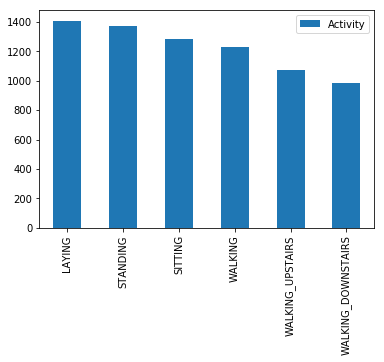

In [5]:
df_train['Activity'].value_counts().plot(kind='bar')
plt.legend()

In [6]:
df_train=df_train.drop('subject',axis=1)

**SPLITING FEATURES AND TARGET FOR TRAIN DATA**

In [7]:
X=df_train.iloc[:,0:len(df_train.columns)-1]
y=df_train.iloc[:,-1]

**APPLYING LABEL ENCODER**

In [8]:
le=LabelEncoder()
y=le.fit_transform(y)

In [9]:
le_name_mapping = dict(zip(le.classes_, le.transform(le.classes_)))
print(le_name_mapping)

{'LAYING': 0, 'SITTING': 1, 'STANDING': 2, 'WALKING': 3, 'WALKING_DOWNSTAIRS': 4, 'WALKING_UPSTAIRS': 5}


**SCALING FEATURES**

In [10]:
sc=StandardScaler()
X=sc.fit_transform(X)

**CHECKING MULTICOLLINEARITY AMONG FEATURES USING VARIANCE INFLATION FACTOR**

In [11]:
x=pd.DataFrame(X)
from statsmodels.stats.outliers_influence import variance_inflation_factor
vif = [variance_inflation_factor(x.values,i) 
for i in range(x.shape[1])]
M=pd.DataFrame({'vif':vif},index=x.columns)
print(M)

               vif
0         5.154825
1         3.090355
2         3.502065
3    125937.548808
4    105282.147589
..             ...
556       2.723653
557       2.009756
558     995.179983
559    1160.689309
560     293.461467

[561 rows x 1 columns]


**VIF VALUE IS HIGH SO APPLYING PCA**

**APPLYING PRINCIPAL COMPONENENT ANALYSIS(PCA)**

In [12]:
pca =PCA(0.95) #95% variance
X_pca=pca.fit_transform(X) #for training data


In [13]:
print(pca.n_components_)

102


**MODEL BUILDING**

In [14]:
models=[]
models.append(('LR', LogisticRegression()))
models.append(('KNN', KNeighborsClassifier()))
models.append(('CART', DecisionTreeClassifier()))
models.append(('NB', GaussianNB()))
models.append(("RF",RandomForestClassifier(n_estimators=100)))
models.append(("AB",AdaBoostClassifier(LogisticRegression())))


In [15]:
results = []
names = []
for name,model in models:
    skf  = model_selection.StratifiedKFold(shuffle=True,n_splits=15,random_state=0)
    cv_results =model_selection.cross_val_score(model,X_pca,y,cv=skf,scoring='f1_weighted')
    print(cv_results)
    results.append(cv_results)
    names.append(name)
    #print("%s: %f (%f)" % (name, np.mean(cv_results),np.var(cv_results,ddof=1)))
    print()
    print('F1SCORE WEIGHTED:',name,':',np.mean(cv_results))
    print('BIAS ERROR OF',name,':',1-np.mean(cv_results))
    print('VARIANCE ERROR OF',name,':',np.var(cv_results,ddof=1))
    print('------------------------------------------------------------------------------------------------------------')

[0.96132084 0.97558893 0.96335862 0.97763253 0.96748759 0.9674256
 0.97569669 0.95508175 0.97147985 0.96937052 0.96731378 0.97322964
 0.97314983 0.9649991  0.97108328]

F1SCORE WEIGHTED: LR : 0.9689479033284966
BIAS ERROR OF LR : 0.031052096671503437
VARIANCE ERROR OF LR : 3.690045235445116e-05
------------------------------------------------------------------------------------------------------------
[0.96920945 0.96528632 0.97555408 0.96326752 0.95733782 0.961063
 0.94326341 0.95898576 0.95044014 0.96305245 0.94702983 0.95860153
 0.97319429 0.95260601 0.9607832 ]

F1SCORE WEIGHTED: KNN : 0.959978320118775
BIAS ERROR OF KNN : 0.04002167988122496
VARIANCE ERROR OF KNN : 8.249860092650269e-05
------------------------------------------------------------------------------------------------------------
[0.83807491 0.80886153 0.80720464 0.85307945 0.85113718 0.82683193
 0.81986548 0.85853378 0.82281428 0.82673516 0.81171747 0.81152049
 0.80840932 0.83490626 0.82234115]

F1SCORE WEIGHTED: CA

CHOOSING BEST MODEL FROM THE ABOVE RESULTS:
1. LOGISTIC REGRESSION MODEL HAS A LOW BIAS AND VARIANCE ERROR
2. LOGISTIC REGRESSION MODEL HAS HIGH F1SCORE.

HYPERPARAMETER TUNING FOR LOGISTIC REGRESSION

In [16]:
from sklearn.model_selection import GridSearchCV 
  
# Creating the hyperparameter grid 
param_grid = {'penalty':['l1','l2']} 
  
# Instantiating logistic regression classifier 
lr = LogisticRegression() 
  
# Instantiating the GridSearchCV object 
lr_cv = GridSearchCV(lr, param_grid, cv = 5) 
  
lr_cv.fit(X_pca,y) 
  
# Print the tuned parameters and score 
print("Tuned Logistic Regression Parameters: {}".format(lr_cv.best_params_))  
print("Best score is {}".format(lr_cv.best_score_)) 

Tuned Logistic Regression Parameters: {'penalty': 'l1'}
Best score is 0.9179815016322089


**MODEL BUILDING AFTER HYPERPARAMETER TUNING**

In [17]:
skf=model_selection.StratifiedKFold(shuffle=True,n_splits=15,random_state=0)
LR=LogisticRegression(penalty='l1')
results=model_selection.cross_val_score(LR,X_pca,y,cv=skf,scoring='f1_weighted')
print('F1SCORE WEIGHTED:',':',np.mean(results))
print('BIAS ERROR OF',':',1-np.mean(results))
print('VARIANCE ERROR OF',':',np.var(results,ddof=1))

F1SCORE WEIGHTED: : 0.9718123167591421
BIAS ERROR OF : 0.028187683240857853
VARIANCE ERROR OF : 3.583779589372305e-05


**READING TEST DATA**

In [18]:
df_test=pd.read_csv('../input/human-activity-recognition-with-smartphones/test.csv')

In [19]:
df_test.head()

,tBodyAcc-mean()-X,tBodyAcc-mean()-Y,tBodyAcc-mean()-Z,tBodyAcc-std()-X,tBodyAcc-std()-Y,tBodyAcc-std()-Z,tBodyAcc-mad()-X,tBodyAcc-mad()-Y,tBodyAcc-mad()-Z,tBodyAcc-max()-X,...,fBodyBodyGyroJerkMag-kurtosis(),"angle(tBodyAccMean,gravity)","angle(tBodyAccJerkMean),gravityMean)","angle(tBodyGyroMean,gravityMean)","angle(tBodyGyroJerkMean,gravityMean)","angle(X,gravityMean)","angle(Y,gravityMean)","angle(Z,gravityMean)",subject,Activity
0,0.257178,-0.023285,-0.014654,-0.938404,-0.920091,-0.667683,-0.952501,-0.925249,-0.674302,-0.894088,...,-0.705974,0.006462,0.162920,-0.825886,0.271151,-0.720009,0.276801,-0.057978,2,STANDING
1,0.286027,-0.013163,-0.119083,-0.975415,-0.967458,-0.944958,-0.986799,-0.968401,-0.945823,-0.894088,...,-0.594944,-0.083495,0.017500,-0.434375,0.920593,-0.698091,0.281343,-0.083898,2,STANDING
2,0.275485,-0.026050,-0.118152,-0.993819,-0.969926,-0.962748,-0.994403,-0.970735,-0.963483,-0.939260,...,-0.640736,-0.034956,0.202302,0.064103,0.145068,-0.702771,0.280083,-0.079346,2,STANDING
3,0.270298,-0.032614,-0.117520,-0.994743,-0.973268,-0.967091,-0.995274,-0.974471,-0.968897,-0.938610,...,-0.736124,-0.017067,0.154438,0.340134,0.296407,-0.698954,0.284114,-0.077108,2,STANDING
4,0.274833,-0.027848,-0.129527,-0.993852,-0.967445,-0.978295,-0.994111,-0.965953,-0.977346,-0.938610,...,-0.846595,-0.002223,-0.040046,0.736715,-0.118545,-0.692245,0.290722,-0.073857,2,STANDING


In [20]:
df_test=df_test.drop('subject',axis=1)

**SPLIT TARGET AND FEATURE FOR TEST DATA**

In [21]:
X_test=df_test.iloc[:,0:len(df_test.columns)-1]

y_test=df_test.iloc[:,-1]

**LABEL ENCODING TRANSFORMATION FOR TEST DATA**

In [22]:
y_test=le.transform(y_test)

**STANDARD SCALER TRANSFORMATION FOR TEST DATA**

In [23]:
X_test =sc.transform(X_test)

**PCA TRANSFORMATION FOR TEST DATA**

In [24]:
X_test = pca.transform(X_test)

In [25]:
model=LogisticRegression(penalty='l1')
model.fit(X_pca,y)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l1',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

**MODEL EVALUATION**

In [26]:
y_pred=model.predict(X_test)

In [27]:
from sklearn.metrics import classification_report,accuracy_score
print(classification_report(y_test,y_pred))
print("Accuracy:",accuracy_score(y_test, y_pred)*100)

              precision    recall  f1-score   support

           0       1.00      1.00      1.00       537
           1       0.92      0.87      0.89       491
           2       0.89      0.93      0.91       532
           3       0.91      0.98      0.95       496
           4       0.95      0.92      0.93       420
           5       0.93      0.89      0.91       471

    accuracy                           0.93      2947
   macro avg       0.93      0.93      0.93      2947
weighted avg       0.93      0.93      0.93      2947

Accuracy: 93.34916864608076
